In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
len(df)

550068

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
pd.Series(df.columns)

0                        User_ID
1                     Product_ID
2                         Gender
3                            Age
4                     Occupation
5                  City_Category
6     Stay_In_Current_City_Years
7                 Marital_Status
8             Product_Category_1
9             Product_Category_2
10            Product_Category_3
11                      Purchase
dtype: object

In [5]:
df = df.drop(['Product_ID','User_ID'],axis=1)

In [6]:
# Gender

In [7]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

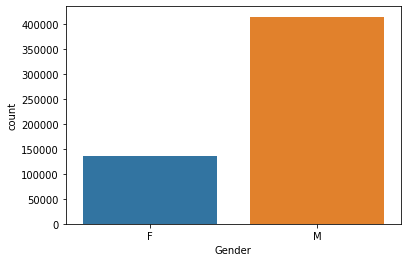

In [8]:
sns.countplot(df['Gender'])

In [9]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [10]:
# Age

In [11]:
resetter = pd.DataFrame(df.Age.value_counts().sort_index()).drop('Age',axis=1)
resetter.reset_index(level=0, inplace=True)
resetter.index += 1
resetter.reset_index(level=0, inplace=True)
resetter = resetter.set_index('index')
resetter = resetter.to_dict().get('level_0')
resetter

{'0-17': 1,
 '18-25': 2,
 '26-35': 3,
 '36-45': 4,
 '46-50': 5,
 '51-55': 6,
 '55+': 7}

In [12]:
df['Age'] = df['Age'].map(resetter)
df['Age'].value_counts()

3    219587
4    110013
2     99660
5     45701
6     38501
7     21504
1     15102
Name: Age, dtype: int64

In [13]:
# City Category

In [14]:
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['City_Category'], drop_first=True)

In [16]:
# Stay in current city

In [17]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [18]:
df.loc[df['Stay_In_Current_City_Years'] == '4+',"Stay_In_Current_City_Years"] = 4

In [19]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)

In [20]:
# Marital_Status

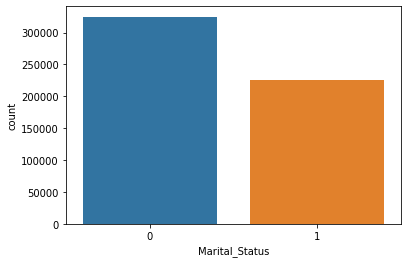

In [21]:
sns.countplot(df.Marital_Status)

In [22]:
# City_Category

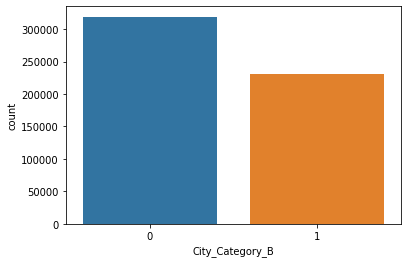

In [23]:
sns.countplot(df.City_Category_B)

In [24]:
# Product Category

In [25]:
df.Product_Category_1 = df.Product_Category_1.astype(float)

In [26]:
from collections import Counter

In [27]:
all_c = dict(Counter(df.Product_Category_3.value_counts().sort_index().to_dict()) + Counter(df.Product_Category_2.value_counts().sort_index().to_dict()) + Counter(df.Product_Category_1.value_counts().sort_index().to_dict()))
all_c = sorted(all_c.items(), key=lambda x: x[1], reverse=True)

all_c,len(all_c)

([(5.0, 193826),
  (8.0, 190575),
  (1.0, 140378),
  (16.0, 85719),
  (14.0, 75059),
  (2.0, 73081),
  (15.0, 72158),
  (6.0, 41822),
  (11.0, 40226),
  (4.0, 39305),
  (17.0, 30600),
  (3.0, 23710),
  (13.0, 21539),
  (12.0, 18721),
  (9.0, 17682),
  (18.0, 10524),
  (10.0, 9894),
  (7.0, 4347),
  (20.0, 2550),
  (19.0, 1603)],
 20)

In [28]:
list_of_cat = []
rest_of_cat = []
def prod_cat_label(limit):
    ca_c = 0
    for i in range(len(all_c)):
        if(i<limit):
            ca_c = ca_c + all_c[i][1]
            list_of_cat.append(all_c[i][0])
        else:
            rest_of_cat.append(all_c[i][0])
    for i in list_of_cat:
        df['prod_cat_'+str(i)] = (df['Product_Category_1']==i) | (df['Product_Category_2']==i) | (df['Product_Category_3']==i)
        df['prod_cat_'+str(i)] = df['prod_cat_'+str(i)].astype(int)
    df['rest_cat'] = 0    
    for i in rest_of_cat:
        df['rest_cat'] = (df['rest_cat']) | (df['Product_Category_1']==i) | (df['Product_Category_2']==i) | (df['Product_Category_3']==i)
    df['rest_cat'] = df['rest_cat'].astype(int)    
    return ca_c

In [29]:
total_c = 0
for i in range(len(all_c)):
    total_c += all_c[i][1]

ca_c = prod_cat_label(5)                                    # Product category feature encoding limit
print(list_of_cat,rest_of_cat)
total_c,ca_c,total_c-ca_c

[5.0, 8.0, 1.0, 16.0, 14.0] [2.0, 15.0, 6.0, 11.0, 4.0, 17.0, 3.0, 13.0, 12.0, 9.0, 18.0, 10.0, 7.0, 20.0, 19.0]


(1093319, 685557, 407762)

In [30]:
df = df.drop(['Product_Category_1','Product_Category_2','Product_Category_3'],axis=1)
df.rest_cat.value_counts()

1    297365
0    252703
Name: rest_cat, dtype: int64

In [31]:
# Occupation

In [32]:
all_o = dict(df.Occupation.value_counts().sort_values(ascending = True))
all_o = [(k, v) for k, v in all_o.items()]
all_o,len(all_o)

([(8, 1546),
  (9, 6291),
  (18, 6622),
  (13, 7728),
  (19, 8461),
  (11, 11586),
  (15, 12165),
  (5, 12177),
  (10, 12930),
  (3, 17650),
  (6, 20355),
  (16, 25371),
  (2, 26588),
  (14, 27309),
  (12, 31179),
  (20, 33562),
  (17, 40043),
  (1, 47426),
  (7, 59133),
  (0, 69638),
  (4, 72308)],
 21)

In [33]:
total_o = 0
rm_o = 0
for i in range(len(all_o)):
    total_o += all_o[i][1]

In [34]:
df = pd.get_dummies(df, columns=['Occupation'])
def pro_o_label(limit,df):
    rm_o = 0
    limit = len(all_o) - limit
    for i in range(limit):
        rm_o = rm_o + all_o[i][0]
        df = df.drop(['Occupation_'+str(all_o[i][0])],axis=1)
    return df,rm_o 
df,rm_o = pro_o_label(5,df)                                              # Occupation category feature encoding limit
total_o,total_o-rm_o,rm_o


(550068, 549887, 181)

In [35]:
# EDA 2.0

In [36]:
df.describe()

,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,Gender_M,City_Category_B,City_Category_C,prod_cat_5.0,prod_cat_8.0,prod_cat_1.0,prod_cat_16.0,prod_cat_14.0,rest_cat,Occupation_0,Occupation_1,Occupation_4,Occupation_7,Occupation_17
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,3.496430,1.858418,0.409653,9263.968713,0.753105,0.420263,0.311189,0.352367,0.346457,0.255201,0.155833,0.136454,0.540597,0.126599,0.086218,0.131453,0.107501,0.072796
std,1.353632,1.289443,0.491770,5023.065394,0.431205,0.493601,0.462980,0.477708,0.475841,0.435975,0.362698,0.343270,0.498350,0.332523,0.280687,0.337895,0.309750,0.259802
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,5823.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,8047.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,1.000000,12054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,4.000000,1.000000,23961.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.corr()['Purchase'].sort_values()[:-1]

prod_cat_5.0                 -0.314459
prod_cat_14.0                -0.103877
prod_cat_8.0                 -0.067807
City_Category_B              -0.019098
Occupation_1                 -0.019005
Occupation_0                 -0.010576
Occupation_4                 -0.003872
Marital_Status               -0.000463
Stay_In_Current_City_Years    0.005422
Occupation_7                  0.011176
Age                           0.015839
Occupation_17                 0.031099
Gender_M                      0.060346
City_Category_C               0.061012
prod_cat_16.0                 0.187003
rest_cat                      0.226302
prod_cat_1.0                  0.506021
Name: Purchase, dtype: float64

In [38]:
# Split

In [39]:
X = df.drop('Purchase',axis=1).values
y = df['Purchase'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
## Scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train.shape,X_test.shape

((440054, 17), (110014, 17))

In [47]:
# Model building

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
X.shape,y.shape

((550068, 17), (550068,))

In [49]:
model = Sequential()

model.add(Dense(17,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [50]:
# Training

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [52]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=300,batch_size=128,verbose=1,callbacks=[early_stop])

Train on 440054 samples, validate on 110014 samples
Epoch 1/300
440054/440054 [==============================] - 11s 25us/sample - loss: 57078687.2662 - val_loss: 29288557.3676
Epoch 2/300
440054/440054 [==============================] - 11s 25us/sample - loss: 50033348.5522 - val_loss: 28582216.5866
Epoch 3/300
440054/440054 [==============================] - 11s 24us/sample - loss: 48289934.5723 - val_loss: 26796797.6644
Epoch 4/300
440054/440054 [==============================] - 11s 25us/sample - loss: 47154107.6865 - val_loss: 25728667.7328
Epoch 5/300
440054/440054 [==============================] - 11s 24us/sample - loss: 46833646.4614 - val_loss: 26920441.7997
Epoch 6/300
440054/440054 [==============================] - 11s 25us/sample - loss: 46262983.8764 - val_loss: 27216498.0072
Epoch 7/300
440054/440054 [==============================] - 11s 25us/sample - loss: 45716670.9707 - val_loss: 26551214.9211
Epoch 8/300
440054/440054 [==============================] - 11s 25us/sam

440054/440054 [==============================] - 12s 27us/sample - loss: 37410755.0241 - val_loss: 21475584.4563
Epoch 66/300
440054/440054 [==============================] - 11s 26us/sample - loss: 37353745.9177 - val_loss: 22092832.5599
Epoch 67/300
440054/440054 [==============================] - 12s 27us/sample - loss: 37397262.9999 - val_loss: 22306753.8191
Epoch 68/300
440054/440054 [==============================] - 12s 27us/sample - loss: 37282855.7151 - val_loss: 22611758.0860
Epoch 69/300
440054/440054 [==============================] - 12s 28us/sample - loss: 37476938.6717 - val_loss: 21986241.7730
Epoch 70/300
440054/440054 [==============================] - 13s 28us/sample - loss: 37410056.7142 - val_loss: 22946191.8900
Epoch 71/300
440054/440054 [==============================] - 13s 29us/sample - loss: 37277727.9399 - val_loss: 21998395.0857
Epoch 72/300
440054/440054 [==============================] - 13s 29us/sample - loss: 37290508.9963 - val_loss: 22305982.2475
Epoch

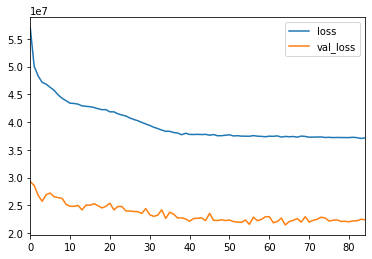

In [53]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()